In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import IPython, torch, warnings
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


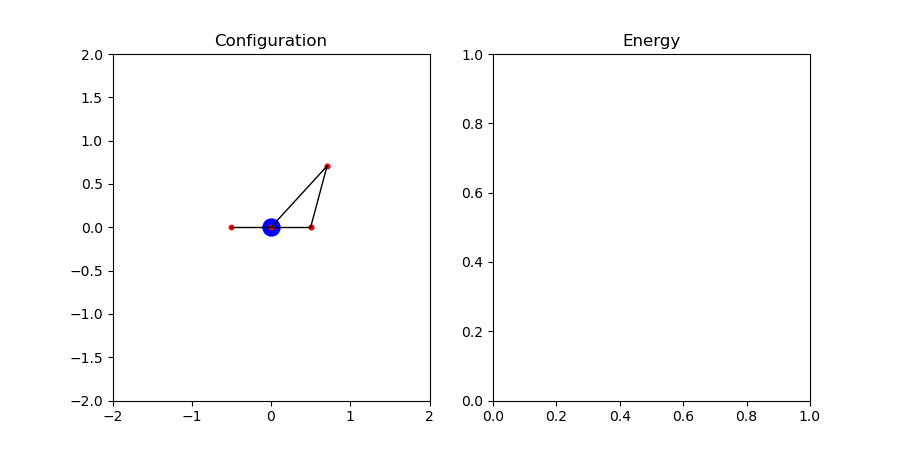

In [4]:
linkage = gs.Linkage()

In [5]:
linkage.show_controllers(wait=True)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [6]:
linkage.solve = False

In [7]:
A = linkage.add_anchorpoint(at=[0,0,0])

In [8]:
a = A.add_onpointline(L=1, theta=0, beta=0.5)
#a.lock('beta')

In [9]:
b = A.add_onpointline(L=1, theta=45, beta=0)
#b.lock('beta')

In [10]:
c = linkage.add_frompointsline(a.p2, b.p2)

In [11]:
with linkage.solve_off():
    c.constrain_length(0)

In [12]:
linkage.get_param_dict().keys()

dict_keys(['line.a.theta', 'line.a.beta', 'line.b.theta', 'line.b.beta'])

In [13]:
with linkage.solve_off():
    with linkage.manual_on():
        a.set_parameter('theta', np.linspace(0, 2*np.pi, 98).tolist())
        a.set_parameter('beta', np.linspace(0, 1, 98).tolist())
        b.set_parameter('theta', np.linspace(0, 2*np.pi, 98).tolist())
        b.set_parameter('beta', np.linspace(0, 1, 98).tolist())

In [14]:
linkage.energy().shape

torch.Size([])

In [15]:
with linkage.explicit_on():
    print(linkage._energy().shape)

torch.Size([98])


In [16]:
linkage._energy().shape

torch.Size([98, 98, 98, 98])

In [17]:
linkage.get_full_energy().shape

torch.Size([10, 10, 10, 10])

In [18]:
#linkage.solve = True

In [19]:
linkage.update()

In [20]:
E = linkage.get_full_energy()

In [21]:
E.shape

torch.Size([10, 10, 10, 10])

In [22]:
(E==E.min()).to(torch.long).nonzero()

tensor([[0, 0, 0, 0],
        [0, 1, 0, 1],
        [0, 2, 0, 2],
        [0, 3, 0, 3],
        [0, 4, 0, 4],
        [0, 5, 0, 5],
        [0, 6, 0, 6],
        [0, 7, 0, 7],
        [0, 8, 0, 8],
        [0, 9, 0, 9],
        [0, 9, 1, 9],
        [0, 9, 2, 9],
        [0, 9, 3, 9],
        [0, 9, 4, 9],
        [0, 9, 5, 9],
        [0, 9, 6, 9],
        [0, 9, 7, 9],
        [0, 9, 8, 9],
        [0, 9, 9, 9],
        [1, 0, 1, 0],
        [1, 1, 1, 1],
        [1, 2, 1, 2],
        [1, 3, 1, 3],
        [1, 4, 1, 4],
        [1, 5, 1, 5],
        [1, 6, 1, 6],
        [1, 7, 1, 7],
        [1, 8, 1, 8],
        [1, 9, 0, 9],
        [1, 9, 1, 9],
        [1, 9, 2, 9],
        [1, 9, 3, 9],
        [1, 9, 4, 9],
        [1, 9, 5, 9],
        [1, 9, 6, 9],
        [1, 9, 7, 9],
        [1, 9, 8, 9],
        [1, 9, 9, 9],
        [2, 0, 2, 0],
        [2, 1, 2, 1],
        [2, 2, 2, 2],
        [2, 3, 2, 3],
        [2, 4, 2, 4],
        [2, 5, 2, 5],
        [2, 6, 2, 6],
        [2